# **Visualization and Interactive Dashboards:LongCovid tweets**#

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Претпроцесирање на податоците**

In [ ]:
!pip install pandas plotly dash

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/lc2020.csv',parse_dates=['Date'],encoding='ISO-8859-1')
data.head()

,Date,User,Tweets
0,2020-04-01 00:23:31+00:00,Jennyjen_k,March was 367 days long. We are now finally em...
1,2020-04-01 01:25:41+00:00,flowers197624,I never seen nothing made in China last so lon...
2,2020-04-01 01:26:29+00:00,Rcarvz,@stoolpresidente I wonder how long Covid lives...
3,2020-04-01 01:38:13+00:00,NaniWaialeale,Many have wondered how long COVID-19 lasts on ...
4,2020-04-01 02:43:35+00:00,graymaxwell1,@realDonaldTrump Pre-existing issues caused my...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158280 entries, 0 to 158279
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype              
---  ------  --------------   -----              
 0   Date    158280 non-null  datetime64[ns, UTC]
 1   User    158280 non-null  object             
 2   Tweets  158280 non-null  object             
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 3.6+ MB


In [ ]:
data.isnull().sum()

Date      0
User      0
Tweets    0
dtype: int64

# **Визуелизација и креирање на dashboards**

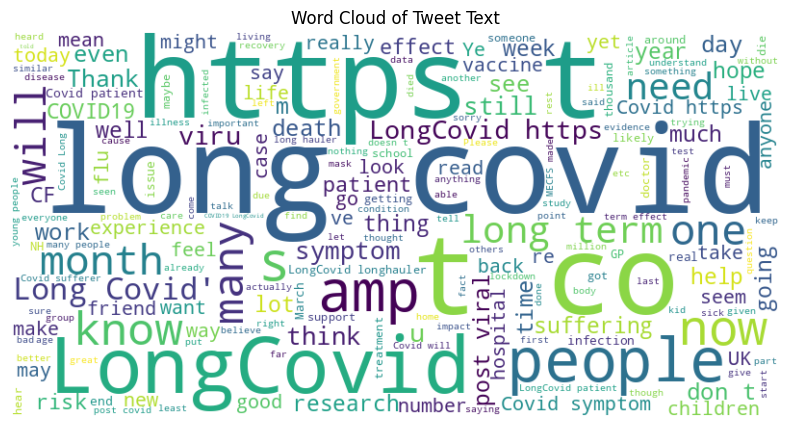

In [34]:
# Visualization: Word Cloud
from plotly.subplots import make_subplots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Tweets']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweet Text')
plt.show()

# Create the dashboard layout
dashboard = make_subplots(rows=2, cols=1, subplot_titles=['Tweet Volume Over Time', 'Word Cloud of Tweet Text'])
dashboard.add_trace(fig1.data[0], row=1, col=1)
# Add the Word Cloud here as well (can't directly add Plotly figure, only Matplotlib)

# Show the dashboard
dashboard.show()

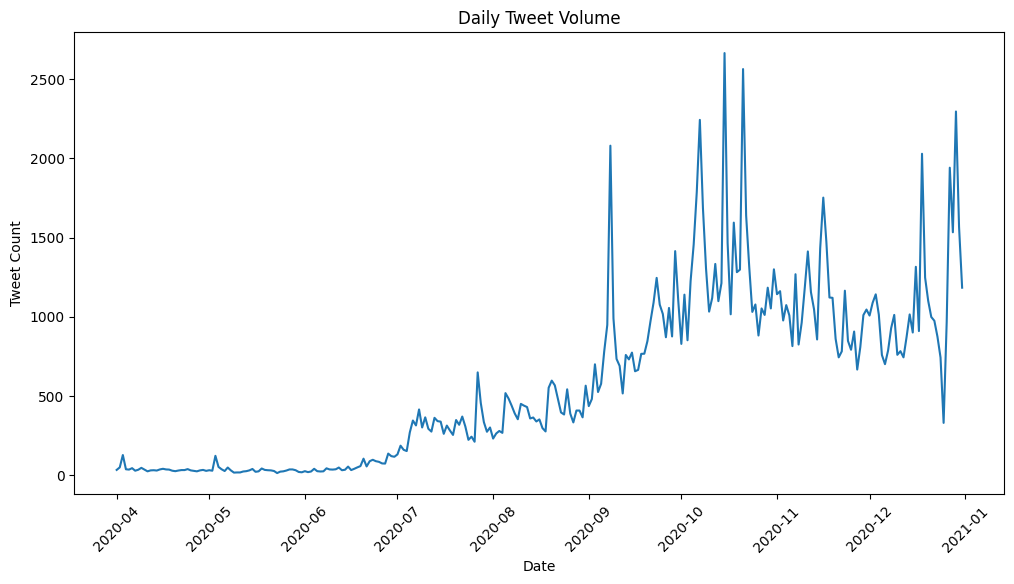

In [35]:
# Time Series Plot: Daily Tweet Volume
daily_tweet_volume = data.groupby(pd.Grouper(key='Date', freq='D')).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
plt.plot(daily_tweet_volume['Date'], daily_tweet_volume['Count'])
plt.title('Daily Tweet Volume')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.show()


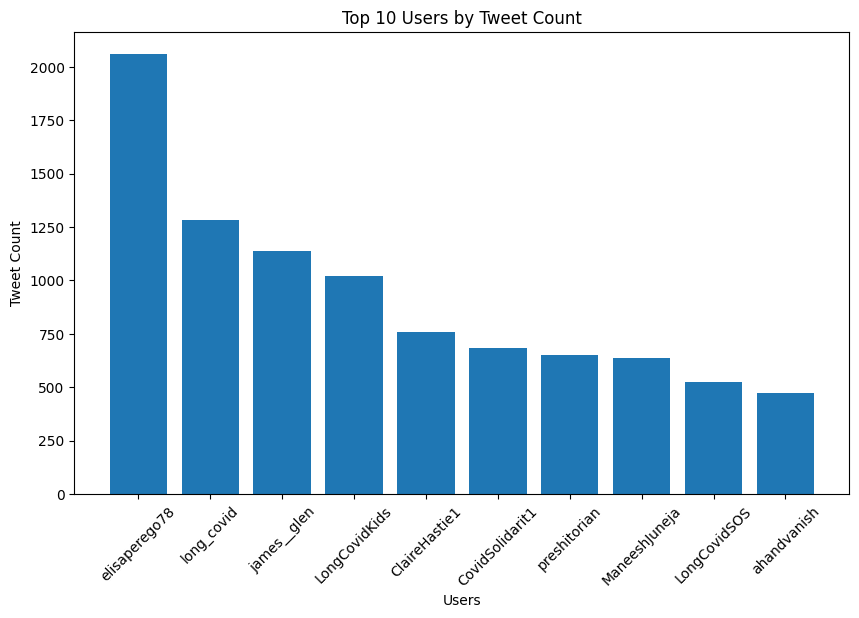

In [36]:
# Bar Chart: Top Users by Tweet Count
top_users = data['User'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_users.index, top_users.values)
plt.title('Top 10 Users by Tweet Count')
plt.xlabel('Users')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.show()

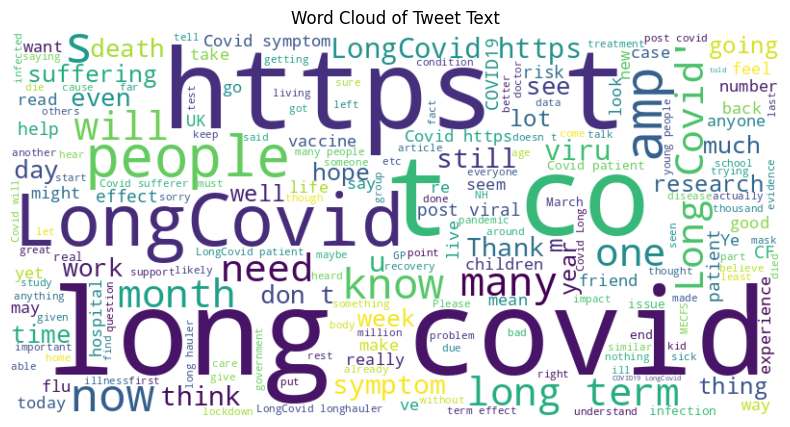

In [37]:
# Word Cloud: Most Common Words in Tweets
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Tweets']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweet Text')
plt.show()


In [38]:
# Interactive Bar Chart: Top Users by Tweet Count (using Plotly Express)
top_users_df = pd.DataFrame({'User': top_users.index, 'Tweet Count': top_users.values})
fig = px.bar(top_users_df, x='User', y='Tweet Count', title='Top 10 Users by Tweet Count')
fig.show()

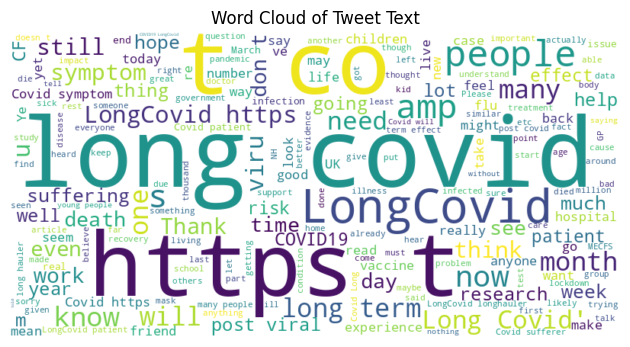

In [39]:
from IPython.display import display, HTML
# Interactive Time Series Plot: Daily Tweet Volume (using Plotly Express)
daily_tweet_volume = data.groupby(pd.Grouper(key='Date', freq='D')).size().reset_index(name='Count')
fig1 = px.line(daily_tweet_volume, x='Date', y='Count', title='Daily Tweet Volume')
fig1.update_layout(
    title='Daily Tweet Volume Over Time',
    xaxis_title='Date',
    yaxis_title='Tweet Count',
    annotations=[
        dict(x='2020-05-01', y=80, xref='x', yref='y', text='Important Event', showarrow=True, arrowhead=1)
    ]
)

# Interactive Word Cloud: Most Common Words in Tweets
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Tweets']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweet Text')
plt.tight_layout()
plt.show()

# Combine and display interactive figures
display(HTML("<h1 style='text-align:center;'>Long COVID Tweets Analysis Dashboard</h1>"))
display(fig1)